# 导入模块

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 导入数据

In [11]:
os.listdir('../Datawhale_learning/hands_on_eda/hands-on-data-analysis/第一单元项目集合/')
os.chdir('../Datawhale_learning/hands_on_eda/hands-on-data-analysis/第一单元项目集合/')

In [27]:
train = pd.read_csv('train.csv')

In [13]:
train.head(3)

,乘客ID,是否幸存,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
# 构建一个都是数字的DF
temp = pd.DataFrame(np.arange(8).reshape(2,4), columns=['a','b','c','d'])
temp

,a,b,c,d
0,0,1,2,3
1,4,5,6,7


In [20]:
help(temp.sort_values)
# 可以多列排序，默认是上小下大

Help on method sort_values in module pandas.core.frame:

sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key:Union[Callable[[_ForwardRef('Series')], Union[_ForwardRef('Series'), ~AnyArrayLike]], NoneType]=None) method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    
                .. versionchanged:: 0.23.0
    
                   Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort a

In [24]:
temp1 = temp.sort_values(by=['a'], ascending=False)
temp1

,a,b,c,d
1,4,5,6,7
0,0,1,2,3


In [25]:
help(temp1.sort_index)

Help on method sort_index in module pandas.core.frame:

sort_index(axis=0, level=None, ascending:bool=True, inplace:bool=False, kind:str='quicksort', na_position:str='last', sort_remaining:bool=True, ignore_index:bool=False, key:Union[Callable[[_ForwardRef('Index')], Union[_ForwardRef('Index'), ~AnyArrayLike]], NoneType]=None) method of pandas.core.frame.DataFrame instance
    Sort object by labels (along an axis).
    
    Returns a new DataFrame sorted by label if `inplace` argument is
    ``False``, otherwise updates the original DataFrame and returns None.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis along which to sort.  The value 0 identifies the rows,
        and 1 identifies the columns.
    level : int or level name or list of ints or list of level names
        If not None, sort on values in specified index level(s).
    ascending : bool or list of bools, default True
        Sort ascending vs. descending. When the i

In [26]:
temp1.sort_index()

,a,b,c,d
0,0,1,2,3
1,4,5,6,7


In [28]:
# 总结
# sort_index 按行索引
# sort_values 按列索引

In [30]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [53]:
# 是不是年龄越低，存活率就越高呢？

train.sort_values(by='Age')[['Age','Survived']].loc[0:20,:]['Survived'].mean()

0.4051094890510949

In [57]:
# 两列相加
# 加1是因为自己家族就自己一个人

res = train['SibSp'] + train['Parch'] + 1
res

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Length: 891, dtype: int64

In [60]:
res.sort_values(ascending=False)

846    11
180    11
792    11
159    11
201    11
       ..
682     1
391     1
681     1
680     1
890     1
Length: 891, dtype: int64

In [61]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Fare'>

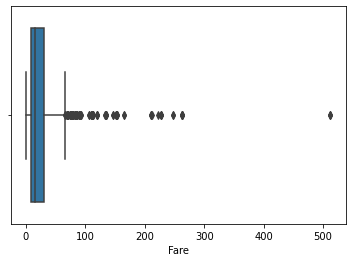

In [62]:
sns.boxplot(train['Fare'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

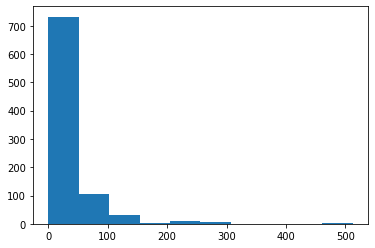

In [64]:
plt.hist(train['Fare'])
# 可以发现票价这一栏有明显的异常值

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

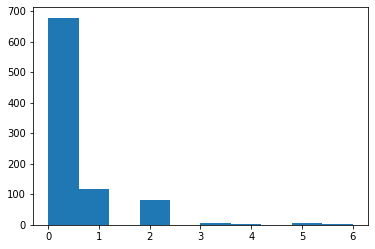

In [65]:
plt.hist(train['Parch'])
# 数据都比较集中